# Introduction to CNN and Computer vision with TensorFlow



## Get the data

The image we're working with are from the FOod101 dataset (101 different classes fo food)

However we've modified it to only use two classes (pizza & steak)

In [1]:
import requests
import zipfile
import os

# Download the file
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
local_zip = "pizza_steak.zip"
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(local_zip, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

# Extract the downloaded ZIP file
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(".")

# Clean up by removing the zip file
os.remove(local_zip)


## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data .

And for a computer vision project... this usually means visualizing many samples of you data.

In [2]:
!dir pizza_steak

 Volume in drive E is DATA
 Volume Serial Number is D0A1-2887

 Directory of e:\CPE\1-2567\Project\AI\pizza_steak

08/21/2024  10:58 PM    <DIR>          .
08/25/2024  11:19 PM    <DIR>          ..
08/21/2024  10:58 PM    <DIR>          test
08/21/2024  10:58 PM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  307,428,843,520 bytes free


In [3]:
!dir pizza_steak\train\

 Volume in drive E is DATA
 Volume Serial Number is D0A1-2887

 Directory of e:\CPE\1-2567\Project\AI\pizza_steak\train

08/21/2024  10:58 PM    <DIR>          .
08/21/2024  10:58 PM    <DIR>          ..
08/21/2024  10:58 PM    <DIR>          pizza
08/21/2024  10:58 PM    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  307,428,843,520 bytes free


In [4]:
!dir pizza_steak\train\steak

 Volume in drive E is DATA
 Volume Serial Number is D0A1-2887

 Directory of e:\CPE\1-2567\Project\AI\pizza_steak\train\steak

08/21/2024  10:58 PM    <DIR>          .
08/21/2024  10:58 PM    <DIR>          ..
08/25/2024  11:19 PM            36,185 1000205.jpg
08/25/2024  11:19 PM            34,497 100135.jpg
08/25/2024  11:19 PM           116,802 101312.jpg
08/25/2024  11:19 PM            56,754 1021458.jpg
08/25/2024  11:19 PM            34,143 1032846.jpg
08/25/2024  11:19 PM            24,688 10380.jpg
08/25/2024  11:19 PM            37,134 1049459.jpg
08/25/2024  11:19 PM            49,841 1053665.jpg
08/25/2024  11:19 PM            59,983 1068516.jpg
08/25/2024  11:19 PM            28,996 1068975.jpg
08/25/2024  11:19 PM            29,525 1081258.jpg
08/25/2024  11:19 PM            49,577 1090122.jpg
08/25/2024  11:19 PM            59,976 1093966.jpg
08/25/2024  11:19 PM            60,253 1098844.jpg
08/25/2024  11:19 PM            69,843 1100074.jpg
08/25/2024  11:19 PM         

In [5]:
import os
# Wlak through pizza_steak directory and list number os files
for dirpath, dirname , filename in os.walk("pizza_steak"):
    print(f'There are {len(dirname)} directories and {len(filename)} images in "{dirpath}".')

There are 2 directories and 0 images in "pizza_steak".
There are 2 directories and 0 images in "pizza_steak\test".
There are 0 directories and 250 images in "pizza_steak\test\pizza".
There are 0 directories and 250 images in "pizza_steak\test\steak".
There are 2 directories and 0 images in "pizza_steak\train".
There are 0 directories and 750 images in "pizza_steak\train\pizza".
There are 0 directories and 750 images in "pizza_steak\train\steak".


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our image, first let's get the class names programmatically.

In [7]:
# Get the classname programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list fo class_name from the subdir 
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    # Set up the target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)
    
    # Get a list of all image file names in the target directory
    image_files = os.listdir(target_folder)
    
    # Ensure there are images in the folder
    if not image_files:
        raise ValueError(f"No images found in the directory: {target_folder}")
    
    # Get a random image path
    random_image = random.choice(image_files)
    image_path = os.path.join(target_folder, random_image)
    print(f"Loading image: {image_path}")
    
    # Read in the image and plot it using matplotlib 
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    return img
    




Loading image: pizza_steak/train/steak\1032846.jpg
Image shape: (307, 512, 3)


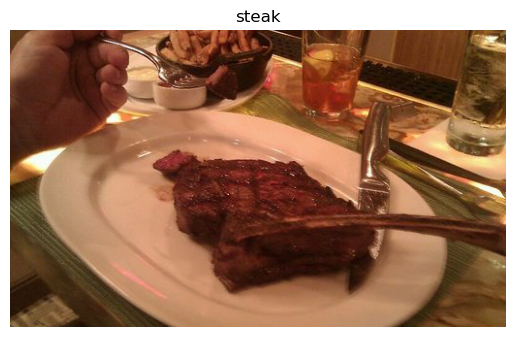

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# Convert the image to a TensorFlow tensor
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(307, 512, 3), dtype=uint8, numpy=
array([[[ 88,  54,  27],
        [ 91,  57,  30],
        [ 96,  62,  34],
        ...,
        [107,  66,  20],
        [118,  78,  27],
        [131,  91,  39]],

       [[ 93,  59,  32],
        [ 94,  60,  32],
        [ 94,  60,  32],
        ...,
        [109,  71,  24],
        [125,  88,  36],
        [131,  94,  41]],

       [[ 95,  61,  33],
        [ 95,  61,  33],
        [ 94,  60,  32],
        ...,
        [121,  88,  37],
        [135, 102,  49],
        [137, 104,  51]],

       ...,

       [[123,  89,  61],
        [134, 100,  72],
        [145, 112,  81],
        ...,
        [120,  83,  41],
        [115,  80,  38],
        [119,  86,  43]],

       [[106,  72,  44],
        [119,  85,  57],
        [133, 100,  69],
        ...,
        [121,  84,  42],
        [114,  79,  37],
        [118,  85,  42]],

       [[ 92,  58,  30],
        [105,  71,  43],
        [122,  89,  58],
        ...,
        [122,  85,  4

In [11]:
img.shape

(307, 512, 3)

In [12]:
# Get all the pixel values between 0&1
img/255.

array([[[0.34509804, 0.21176471, 0.10588235],
        [0.35686275, 0.22352941, 0.11764706],
        [0.37647059, 0.24313725, 0.13333333],
        ...,
        [0.41960784, 0.25882353, 0.07843137],
        [0.4627451 , 0.30588235, 0.10588235],
        [0.51372549, 0.35686275, 0.15294118]],

       [[0.36470588, 0.23137255, 0.1254902 ],
        [0.36862745, 0.23529412, 0.1254902 ],
        [0.36862745, 0.23529412, 0.1254902 ],
        ...,
        [0.42745098, 0.27843137, 0.09411765],
        [0.49019608, 0.34509804, 0.14117647],
        [0.51372549, 0.36862745, 0.16078431]],

       [[0.37254902, 0.23921569, 0.12941176],
        [0.37254902, 0.23921569, 0.12941176],
        [0.36862745, 0.23529412, 0.1254902 ],
        ...,
        [0.4745098 , 0.34509804, 0.14509804],
        [0.52941176, 0.4       , 0.19215686],
        [0.5372549 , 0.40784314, 0.2       ]],

       ...,

       [[0.48235294, 0.34901961, 0.23921569],
        [0.5254902 , 0.39215686, 0.28235294],
        [0.56862745, 0

## An end-to-end example

Let's build a CNN to find pattern in our images , more specifically we need a way to :

* Load our images
* Preprocess our images 
* Build a CNN to find pattern in pur images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1 , also called scaling/normalizations)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to our data dir
train_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/train"
test_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/test"

#batch_size=32 ,
# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=100 ,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=100 ,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model1_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN 
model1_1.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model1_1.fit(train_data,
                       epochs=10,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
15/15 [==============================] - 52s 1s/step - loss: 0.6313 - accuracy: 0.6513 - val_loss: 0.4949 - val_accuracy: 0.7860
Epoch 2/10
15/15 [==============================] - 7s 485ms/step - loss: 0.5126 - accuracy: 0.7587 - val_loss: 0.4236 - val_accuracy: 0.8180
Epoch 3/10
15/15 [==============================] - 7s 487ms/step - loss: 0.4504 - accuracy: 0.8000 - val_loss: 0.4095 - val_accuracy: 0.8000
Epoch 4/10
15/15 [==============================] - 7s 491ms/step - loss: 0.4319 - accuracy: 0.8033 - val_loss: 0.3651 - val_accuracy: 0.8460
Epoch 5/10
15/15 [==============================] - 7s 491ms/step - loss: 0.4003 - accuracy: 0.8260 - val_loss: 0.3487 - val_accuracy: 0.8420
Epoch 6/10
15/15 [==============================] - 8s 501ms/step - loss: 0.3566 - accuracy: 0.8500 - val_loss: 0.3369 - val_accuracy: 0.8340
Epoch 7/10
15/15 [==============================] - 8s 506ms/step -

> **Note:** If the above cell is taking longer than `10 sec. per epoch, make sure you're using GPU  

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1 , also called scaling/normalizations)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to our data dir
train_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/train"
test_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/test"

#batch_size=32 ,
# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32 ,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32 ,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model1_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN 
model1_0.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model1_0.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 166ms/step - loss: 0.5591 - accuracy: 0.7213 - val_loss: 0.4005 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 8s 164ms/step - loss: 0.4366 - accuracy: 0.7967 - val_loss: 0.3798 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 7s 153ms/step - loss: 0.4335 - accuracy: 0.8167 - val_loss: 0.3519 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 7s 154ms/step - loss: 0.3904 - accuracy: 0.8400 - val_loss: 0.3630 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 7s 154ms/step - loss: 0.3248 - accuracy: 0.8720 - val_loss: 0.3329 - val_accuracy: 0.8540


In [29]:
model1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [30]:
model1_0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Using the same model as before 

Let's replicate the model we've build prev. to see if it work on our image data

In [31]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 161ms/step - loss: 0.7095 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 161ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 164ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 164ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [32]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model1_1),
model_2 performs terribly... let's try to improve it.

In [33]:
# Set the random seed
tf.random.set_seed(42)

model_3 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 164ms/step - loss: 3.8132 - accuracy: 0.6213 - val_loss: 0.6007 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 8s 160ms/step - loss: 0.8958 - accuracy: 0.7053 - val_loss: 0.6278 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 8s 161ms/step - loss: 0.8107 - accuracy: 0.7107 - val_loss: 0.4882 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 7s 160ms/step - loss: 0.8484 - accuracy: 0.7080 - val_loss: 0.5261 - val_accuracy: 0.7360
Epoch 5/5
47/47 [==============================] - 8s 162ms/step - loss: 0.6379 - accuracy: 0.7460 - val_loss: 0.6773 - val_accuracy: 0.7100


In [34]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classifications: Let's break it down

1. Become one with the data (visualize ,visualize ,visualize)
2. Prepreocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with baseline)
4. Fit the model
5. Evaluate the model (check the performance)
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (Experiment ,Experiment ,Experiment)

### 1. Become one with the data

Loading image: pizza_steak/train/steak\3095301.jpg
Image shape: (512, 512, 3)
Loading image: pizza_steak/train/pizza\3910117.jpg
Image shape: (512, 512, 3)


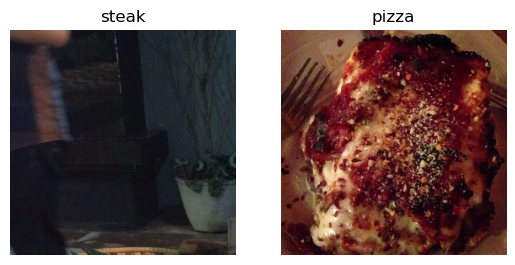

In [35]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Prepreocess the data (prepare it for a model)

In [36]:
# Define directory dataset paths
train_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/train/"
test_dir = "E:/CPE/1-2567/Project/AI/pizza_steak/test/"

Our next step is turn our data into **batches.**

A batches is a small subset of data. Rather than look at all ~10,000 images at one time, a model only look at 32 at a time.

It does this for couple reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Try to learn the pattern in 10,000 images in one hit could result in the model not being able to learn very well.



In [37]:
!nvidia-smi

Sun Aug 25 23:26:03 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  |   00000000:08:00.0  On |                  N/A |
| 57%   47C    P5             31W /  224W |    7781MiB /   8192MiB |     19%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [38]:
# Create train and test the data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [39]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [40]:
# get a sample of a training data batch
images , labels = train_data.next()
len(images) , len(labels)

(32, 32)

In [41]:
len(train_data)

47

In [42]:
1500/32

46.875

In [43]:
# Get the firdt two image
images[:2] , images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [44]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount od architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required .

In [45]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [46]:
# Create the model (this will be our baseline, a layer CNN)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

In [47]:
# Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"])

In [48]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [49]:
# Check the lenghts of training and test data generators
len(train_data) , len(test_data)

(47, 16)

In [50]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 169ms/step - loss: 0.6276 - accuracy: 0.7167 - val_loss: 0.4187 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 7s 158ms/step - loss: 0.4002 - accuracy: 0.8187 - val_loss: 0.3700 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 7s 156ms/step - loss: 0.2737 - accuracy: 0.8980 - val_loss: 0.3173 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 7s 158ms/step - loss: 0.1399 - accuracy: 0.9600 - val_loss: 0.3435 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 7s 157ms/step - loss: 0.0665 - accuracy: 0.9860 - val_loss: 0.4306 - val_accuracy: 0.8220


### 5. Evaluating our model
it look like our model is learning somthing, let's evaluate it.

<Axes: >

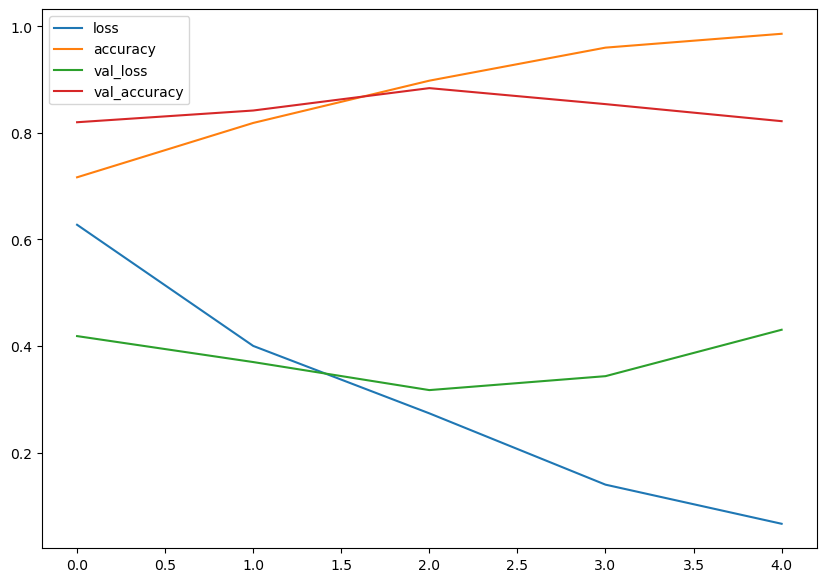

In [51]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [52]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
    """"
    Computer Vision and Convolutional Neural Networks in TensorFlow.ipynb"Return separate loss curve for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) #  How many epochs did we run for?
    
    # Plot loss
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
        # Plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

**Note:** When a model's **validation loss start to increase**, it's likely that the model is **overfitting** the training dataset. This mean, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

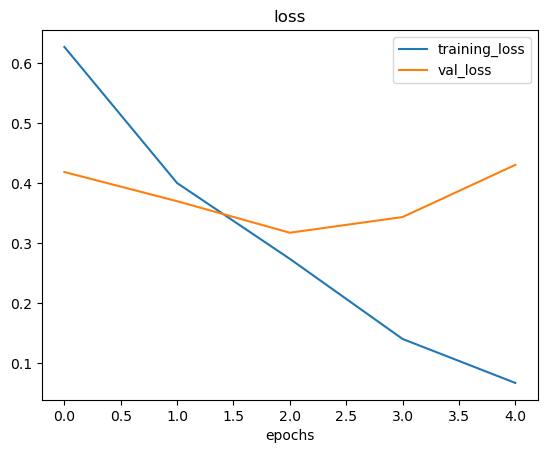

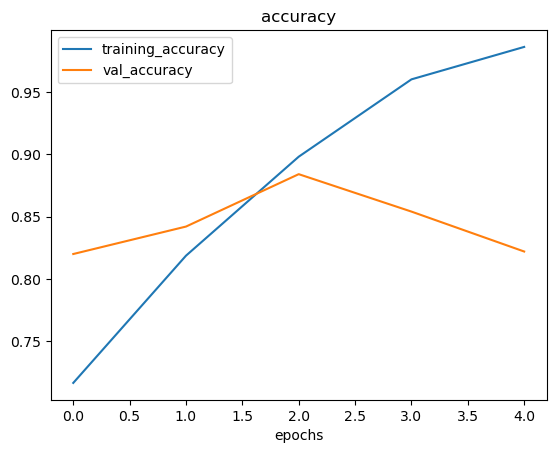

In [53]:
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other

### 6. Adjust the model parameters

Fitting a machine learning model come in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting :
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

> **Note:** Reducing overfitting is also known as **regularization**.

In [54]:
# Creater the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10,3, activation="relu" , input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

In [55]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [56]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 161ms/step - loss: 0.6135 - accuracy: 0.6627 - val_loss: 0.4749 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4330 - accuracy: 0.8160 - val_loss: 0.3433 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 8s 159ms/step - loss: 0.3983 - accuracy: 0.8227 - val_loss: 0.3387 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 7s 156ms/step - loss: 0.3805 - accuracy: 0.8380 - val_loss: 0.3137 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 7s 157ms/step - loss: 0.3563 - accuracy: 0.8507 - val_loss: 0.2966 - val_accuracy: 0.8760


In [57]:
# Get the summary of our model with MaxPool
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

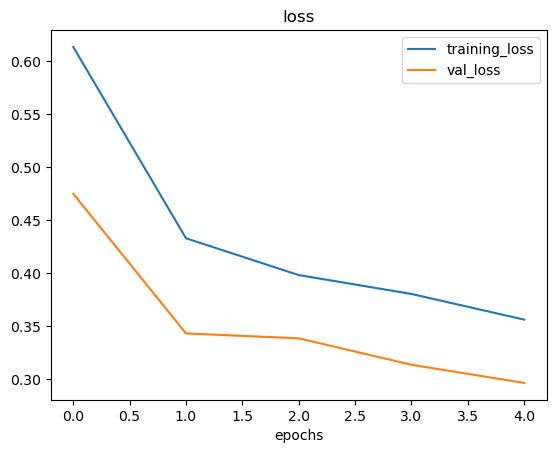

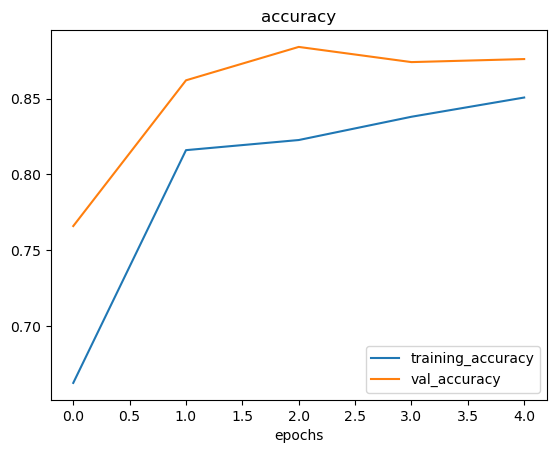

In [58]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentetion 

In [59]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentaion?

Data augmentation is the process of altering our training data, leading to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an images, flipping it, cropping it or somthing similar.

Let's write some code to visualize data augmentations.

In [60]:
# import data and augment it from training dir
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)

# Create non-augmented traing data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224,224)
# Create non-augmented test data batches
print("Non-augmented testing data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented testing data:
Found 500 images belonging to 2 classes.


> **Note:** data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are modified as they loaded into the model.

In [61]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: Labels aren't augmented... only data (images)


Showing image number: 4


(-0.5, 223.5, 223.5, -0.5)

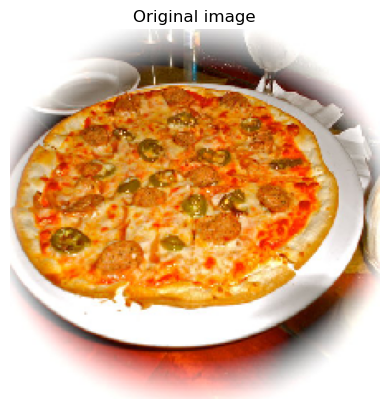

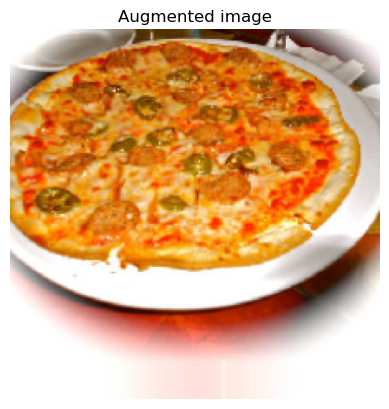

In [62]:
# show original image and augmented image
import random
random_number = random.randint(0,32) # Our batch sizes are 32..
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


Now we've seen what augmented training data looks like , le's build a model and see how it learn on Augmented data

In [63]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10,3, activation="relu" ),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 490ms/step - loss: 0.7193 - accuracy: 0.4660 - val_loss: 0.6729 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 24s 520ms/step - loss: 0.6892 - accuracy: 0.5307 - val_loss: 0.6651 - val_accuracy: 0.5900
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6859 - accuracy: 0.5613 - val_loss: 0.6543 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6803 - accuracy: 0.5887 - val_loss: 0.6393 - val_accuracy: 0.6580
Epoch 5/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6791 - accuracy: 0.5813 - val_loss: 0.6272 - val_accuracy: 0.6220


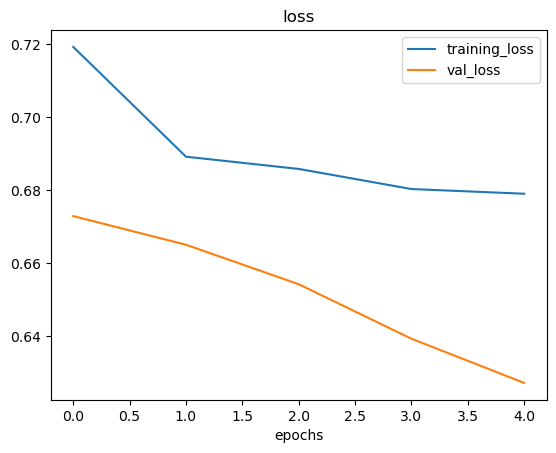

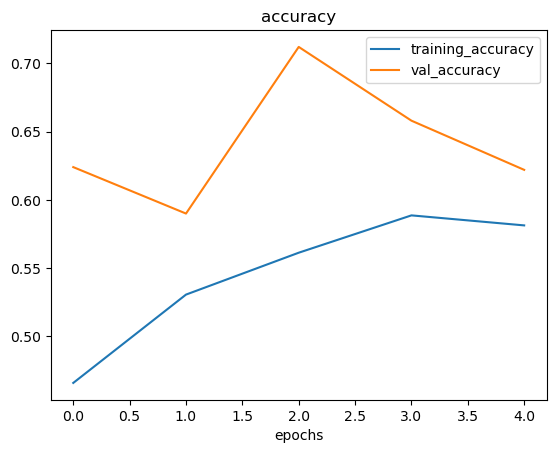

In [64]:
# Check our model training curve 
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happends.

In [65]:
# Import data and augment it and shuffle from training dir
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                        target_size=(224, 224),
                                                                        batch_size=32,
                                                                        class_mode='binary',
                                                                        shuffle=True)

Found 1500 images belonging to 2 classes.


In [66]:
# Create the model (same as model_5)
model_7 = Sequential([
    Conv2D(10,3, activation="relu" ),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 495ms/step - loss: 0.6623 - accuracy: 0.6027 - val_loss: 0.5920 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 23s 481ms/step - loss: 0.5849 - accuracy: 0.6887 - val_loss: 0.4361 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5240 - accuracy: 0.7380 - val_loss: 0.4187 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 22s 476ms/step - loss: 0.4906 - accuracy: 0.7600 - val_loss: 0.4098 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 22s 479ms/step - loss: 0.5043 - accuracy: 0.7533 - val_loss: 0.3672 - val_accuracy: 0.8500


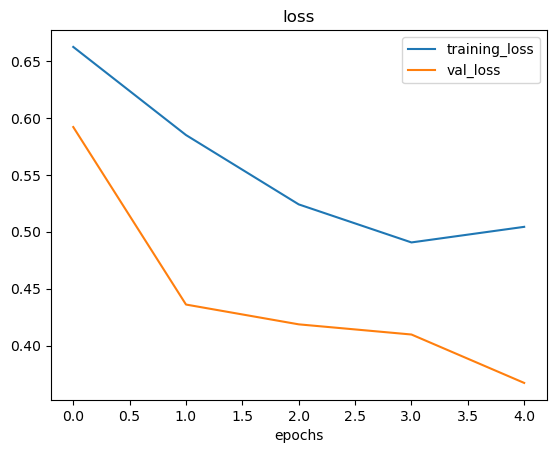

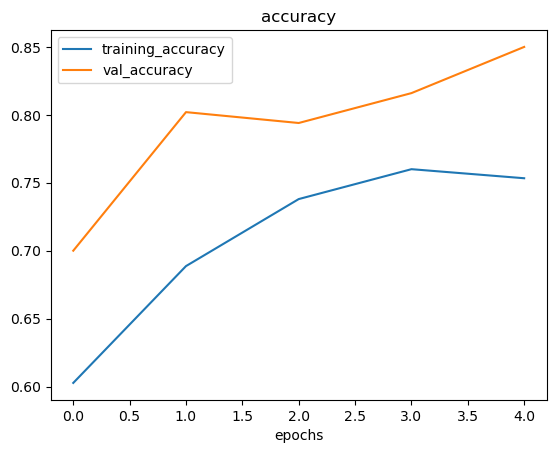

In [67]:
plot_loss_curves(history_7)

**Note** : When shuffle training data, the model gets exposed to all different kind of data

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. mode `Conv2D`/`MaxPool2D` layers)
* Increase the number of filter in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epoch)
* Find an ideal learning rate
* Get more data (give more oppotunities to learn)
* Use **Transfer learning** to leverage what another image model has learn and adjust it for our own use case


## Making a prediction with our trained model on our own custom data

In [68]:
import requests
import os

def convert_and_download_file(github_link):
    # Convert the GitHub link to the raw format
    if "github.com" in github_link and "/blob/" in github_link:
        raw_link = github_link.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
        print("Raw GitHub Link:", raw_link)
        
        # Extract the filename from the URL
        output_filename = os.path.basename(raw_link)
        
        # Download the file from the raw GitHub link
        response = requests.get(raw_link, stream=True)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Open the output file in write-binary mode and save the content
            with open(output_filename, 'wb') as file:
                for chunk in response.iter_content(chunk_size=1024):
                    if chunk:  # Filter out keep-alive new chunks
                        file.write(chunk)
            print(f"File downloaded successfully: {output_filename}")
        else:
            print(f"Failed to download the file. Status code: {response.status_code}")
    else:
        print("Invalid GitHub link")

# Example usage
github_link = "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg"




In [69]:
# Classes we're working with
print(class_names)


['pizza' 'steak']


Raw GitHub Link: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
File downloaded successfully: 03-steak.jpeg


(-0.5, 3023.5, 4031.5, -0.5)

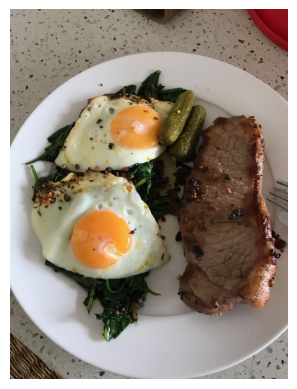

In [70]:
# View our example 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

convert_and_download_file(github_link)
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [71]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> **Note**: When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [72]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [73]:
# Create a function to import and image and resize it to be able to  be use with our model
def load_and_pred_image(filename,image_shape=224):
    """
    Read an image from filename, turns it into a tensor and reshape it to (img_shape,img_shape,colour_Channel)
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[image_shape , image_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img
    

In [74]:
steak = load_and_pred_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [75]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 1s 527ms/step


Look like our custom img is being put though our model, however, it currently output a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [76]:
# Remind ourselves of our class_names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [128]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'chicken_wings'

In [132]:
def pred_and_plot(model,filename,class_names=class_names):
    '''
    Imports an image locate at filename , make a prediction with model
    andplot the inage with the predicted class as the title
    '''
    # Import the target image and preprocess it
    img = load_and_pred_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    print(len(pred[0]))
    print(tf.argmax(pred))
    
    # Add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
    

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 20ms/step


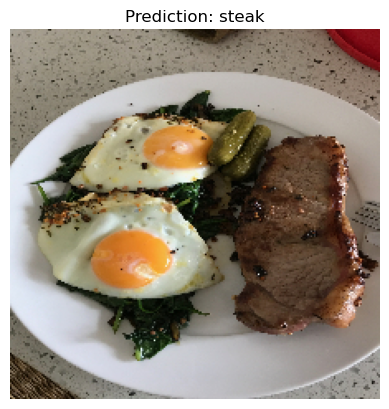

In [79]:
# Test our model on custom image 
pred_and_plot(model_7,"03-steak.jpeg",)

1/1 [==============================] - 0s 20ms/step


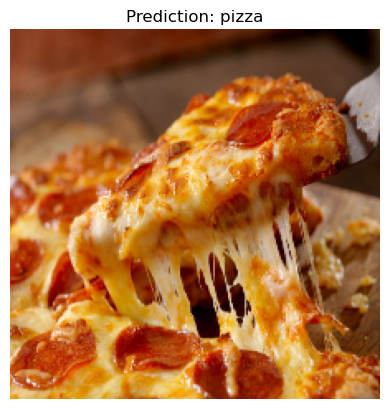

In [80]:
pred_and_plot(model_7,"istockphoto-938742222-612x612.jpg",)

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step thing up a notch with 10 classes of food 
(multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a base line)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [81]:
# import requests
# import zipfile
# import os

# # Download the file
# url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
# local_zip = "10_food_classes_all_data.zip"
# with requests.get(url, stream=True) as r:
#     r.raise_for_status()
#     with open(local_zip, 'wb') as f:
#         for chunk in r.iter_content(chunk_size=8192):
#             f.write(chunk)

# # Extract the downloaded ZIP file
# with zipfile.ZipFile(local_zip, 'r') as zip_ref:
#     zip_ref.extractall(".")

# # Clean up by removing the zip file
# os.remove(local_zip)


In [82]:
import os

# Wlak through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "10_food_classes_all_data".
There are 10 directories and 0 images in "10_food_classes_all_data\test".
There are 0 directories and 250 images in "10_food_classes_all_data\test\chicken_curry".
There are 0 directories and 250 images in "10_food_classes_all_data\test\chicken_wings".
There are 0 directories and 250 images in "10_food_classes_all_data\test\fried_rice".
There are 0 directories and 250 images in "10_food_classes_all_data\test\grilled_salmon".
There are 0 directories and 250 images in "10_food_classes_all_data\test\hamburger".
There are 0 directories and 250 images in "10_food_classes_all_data\test\ice_cream".
There are 0 directories and 250 images in "10_food_classes_all_data\test\pizza".
There are 0 directories and 250 images in "10_food_classes_all_data\test\ramen".
There are 0 directories and 250 images in "10_food_classes_all_data\test\steak".
There are 0 directories and 250 images in "10_food_classes_all_data\test\sushi".
There are 

In [83]:
# Steup the train and test dir
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [84]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Loading image: 10_food_classes_all_data/train/ramen\3504068.jpg
Image shape: (512, 512, 3)


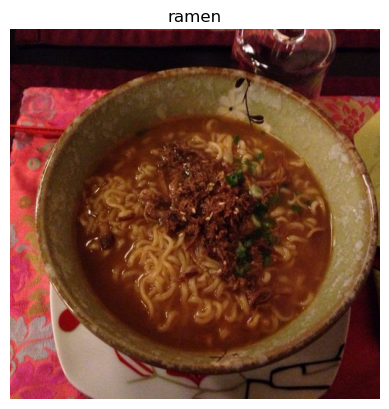

In [85]:
# Visualize, visualize , visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

IMG_SIZE = (224,224)
# Load data in fro dir and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=128,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=128,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website.... how about we just take their model (also on 10 classes) and use it for our problem...?

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D , Flatten , Dense , Activation

model_8 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax"), # Change to have 10 output neurons
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



### 4. Fit a model

In [88]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
59/59 [==============================] - 207s 3s/step - loss: 2.1918 - accuracy: 0.1983 - val_loss: 2.0232 - val_accuracy: 0.2600
Epoch 2/5
59/59 [==============================] - 35s 600ms/step - loss: 1.9610 - accuracy: 0.3151 - val_loss: 1.9314 - val_accuracy: 0.3072
Epoch 3/5
59/59 [==============================] - 35s 589ms/step - loss: 1.8085 - accuracy: 0.3788 - val_loss: 1.8707 - val_accuracy: 0.3480
Epoch 4/5
59/59 [==============================] - 35s 599ms/step - loss: 1.6765 - accuracy: 0.4331 - val_loss: 1.8944 - val_accuracy: 0.3488
Epoch 5/5
59/59 [==============================] - 35s 594ms/step - loss: 1.4434 - accuracy: 0.5247 - val_loss: 1.9516 - val_accuracy: 0.3416


### 5. Evaluate the model

In [89]:
# Evaluate on the test data
model_8.evaluate(test_data)

20/20 [==============================] - 9s 436ms/step - loss: 1.9516 - accuracy: 0.3416


[1.9515784978866577, 0.3416000008583069]

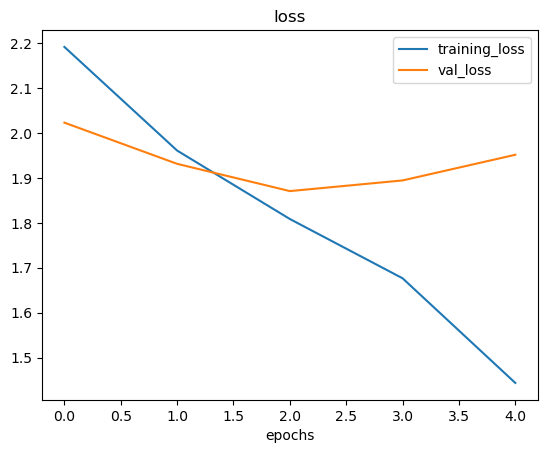

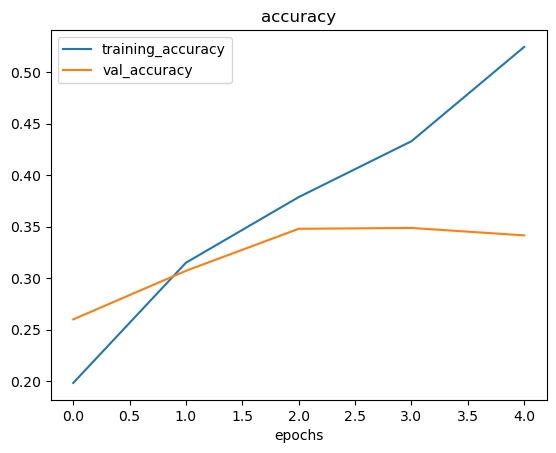

In [90]:
# Check out the model loss curves on the 10 classes
plot_loss_curves(history_8)


What do these loss curves tell us ?

Well... it seem our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to it's performmance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try fix overfitting by...

* **Get more data** - haveing more data gives a model more opportunity to learn diverse patterns...
* **Simply the model** - if our currnet model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden unit in layers.
* **Use data augmentaions** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use tranfer learning** - tranfer learning leverage the pattern another model has learned on similar data to you own and allow you to use those patterns on your own dataset

In [98]:
# How about we try and simplify the model first?
# Let's try to remove 2 convo layers
model_9 =Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [100]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
59/59 [==============================] - 113s 2s/step - loss: 2.0441 - accuracy: 0.2681 - val_loss: 2.0005 - val_accuracy: 0.3048
Epoch 2/5
59/59 [==============================] - 38s 644ms/step - loss: 1.7864 - accuracy: 0.3933 - val_loss: 1.9757 - val_accuracy: 0.3120
Epoch 3/5
59/59 [==============================] - 40s 673ms/step - loss: 1.5404 - accuracy: 0.4939 - val_loss: 2.0487 - val_accuracy: 0.3144
Epoch 4/5
59/59 [==============================] - 43s 721ms/step - loss: 1.2896 - accuracy: 0.5833 - val_loss: 2.0921 - val_accuracy: 0.3068
Epoch 5/5
59/59 [==============================] - 42s 703ms/step - loss: 1.0099 - accuracy: 0.6908 - val_loss: 2.1852 - val_accuracy: 0.2924


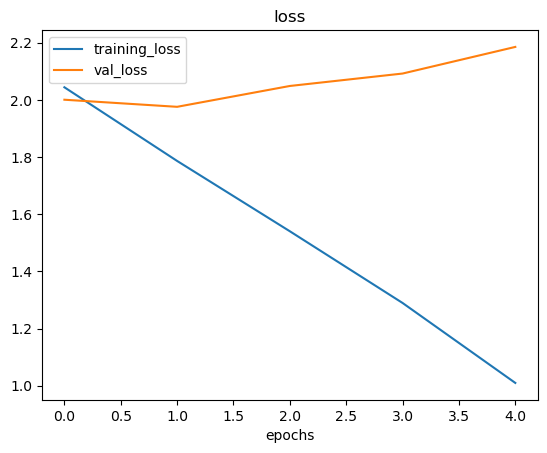

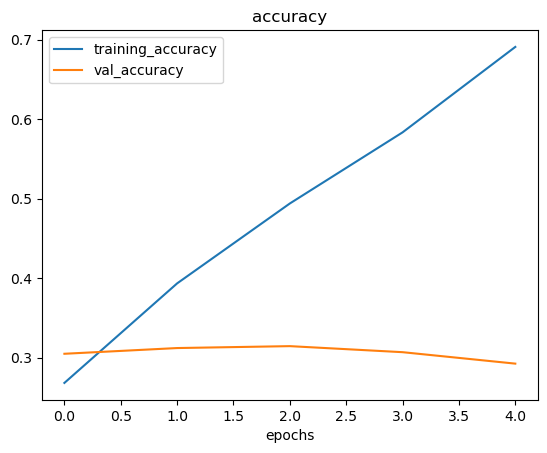

In [101]:
# Check out the loss curves
plot_loss_curves(history_9)

Look like our "simplify the model" experiment didn't work... the accuracy went down and overfitting continue...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's result by using augmented training data...

Idealy, we want to :
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [103]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [105]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [106]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_27 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [114]:
history_10 = model_10.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 126s 535ms/step - loss: 1.8641 - accuracy: 0.3629 - val_loss: 1.8275 - val_accuracy: 0.3592
Epoch 2/5
235/235 [==============================] - 119s 507ms/step - loss: 1.8093 - accuracy: 0.3848 - val_loss: 1.7438 - val_accuracy: 0.4028
Epoch 3/5
235/235 [==============================] - 126s 538ms/step - loss: 1.7758 - accuracy: 0.3988 - val_loss: 1.6807 - val_accuracy: 0.4364
Epoch 4/5
235/235 [==============================] - 123s 524ms/step - loss: 1.7425 - accuracy: 0.4089 - val_loss: 1.6588 - val_accuracy: 0.4484
Epoch 5/5
235/235 [==============================] - 127s 541ms/step - loss: 1.7255 - accuracy: 0.4111 - val_loss: 1.6766 - val_accuracy: 0.4280


In [115]:
model_10.evaluate(test_data)

20/20 [==============================] - 9s 471ms/step - loss: 1.6766 - accuracy: 0.4280


[1.6766119003295898, 0.42800000309944153]

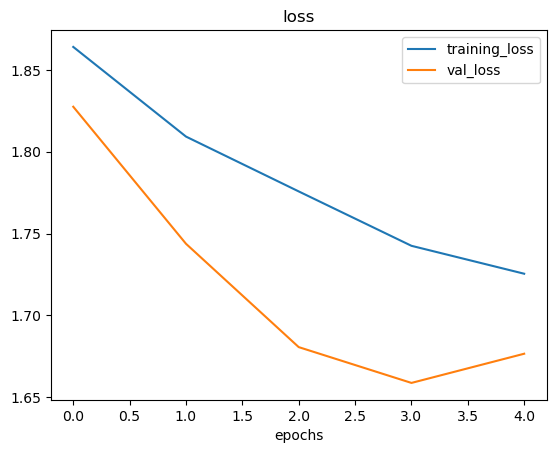

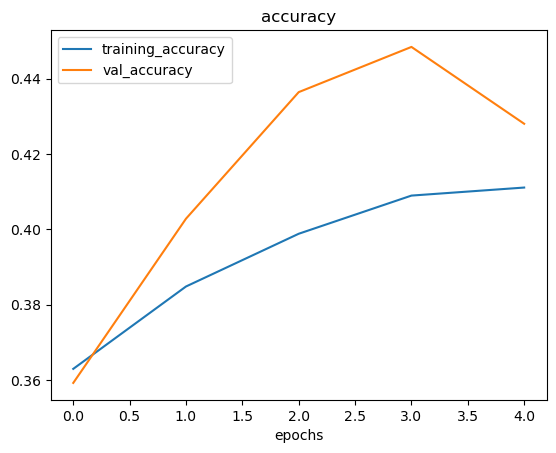

In [116]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

### 7. Repeat until satisfied

We could keep going here... continall trying to bring our loss curves closer together ahd trying to improve the validation/test accuracy

How?

By running lots of experiment, namely
- restructuring our model's architecture (increasing layers/hidden units)
- adjust learning rate
- try different method of data augmentation (adjust the hyper parameters in our ImageDataGenerator instant)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

In [118]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [119]:
history_11 = model_11.fit(train_data_augmented,
            epochs=10,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 128s 543ms/step - loss: 2.2268 - accuracy: 0.1869 - val_loss: 2.0299 - val_accuracy: 0.2672
Epoch 2/10
235/235 [==============================] - 123s 525ms/step - loss: 2.0116 - accuracy: 0.2873 - val_loss: 1.9479 - val_accuracy: 0.2884
Epoch 3/10
235/235 [==============================] - 127s 538ms/step - loss: 1.9447 - accuracy: 0.3276 - val_loss: 1.8634 - val_accuracy: 0.3512
Epoch 4/10
235/235 [==============================] - 123s 524ms/step - loss: 1.8933 - accuracy: 0.3447 - val_loss: 1.8951 - val_accuracy: 0.3308
Epoch 5/10
235/235 [==============================] - 122s 520ms/step - loss: 1.8440 - accuracy: 0.3659 - val_loss: 1.7528 - val_accuracy: 0.4064
Epoch 6/10
235/235 [==============================] - 119s 504ms/step - loss: 1.8248 - accuracy: 0.3721 - val_loss: 1.7576 - val_accuracy: 0.4064
Epoch 7/10
235/235 [==============================] - 126s 538ms/step - loss: 1.8051 - accuracy: 0.3851 - val_loss: 1.7616 -

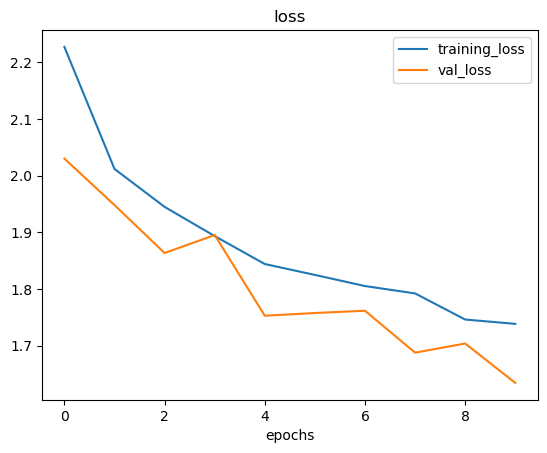

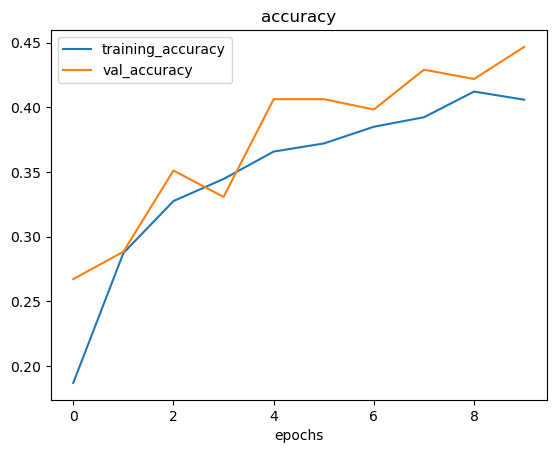

In [120]:
plot_loss_curves(history_11)

### Making a prediction with our trained model

let's use our trained model to make some predictions on our own custom images

In [117]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [121]:
#
convert_and_download_file("https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg")
convert_and_download_file("https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg")

Raw GitHub Link: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
File downloaded successfully: 03-sushi.jpeg
Raw GitHub Link: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
File downloaded successfully: 03-hamburger.jpeg


In [ ]:
# Reconfig pred_and_plot function to work with multi-class 

1/1 [==============================] - 0s 31ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


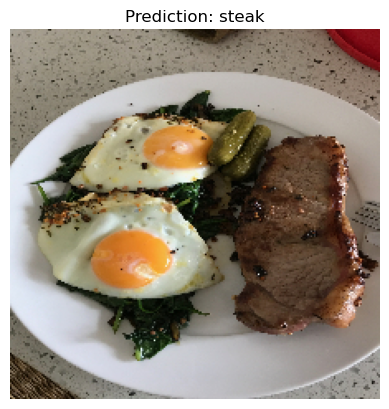

In [136]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~44% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

### Saving and loading our model

In [137]:
# Save a model
model_11.save("saved_trained_model_11")

INFO:tensorflow:Assets written to: saved_trained_model_11\assets


INFO:tensorflow:Assets written to: saved_trained_model_11\assets


In [138]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

20/20 [==============================] - 11s 552ms/step - loss: 1.6343 - accuracy: 0.4468


[1.6343464851379395, 0.44679999351501465]

In [139]:
# Compare our loadde model to our existing model
model_11.evaluate(test_data)

20/20 [==============================] - 11s 543ms/step - loss: 1.6343 - accuracy: 0.4468


[1.634346842765808, 0.44679999351501465]